In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
imports = pd.read_csv('../data/cleaned_data/clean_import.csv')

imports.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,European Union,2572980,2468640,2671800,2715240,2724120,2605440,2784480,2871900,2932140,...,3931320,3963180,4088220,4081860,4313580,4319700,4584120,4453260,4689060,4803420
1,Austria,112800,123480,132360,110160,85020,73860,72600,77640,77580,...,82140,87120,93540,93300,91500,90780,89700,87600,85740,86880
2,Belgium,0,0,0,0,0,0,0,0,0,...,355440,349680,340080,330120,312720,332040,363120,340620,344520,371940
3,Belgium/Luxembourg,120900,104760,109680,123780,135720,144060,151560,152640,214800,...,0,0,0,0,0,0,0,0,0,0
4,Bulgaria,16080,12000,10920,23820,27780,30900,16320,17640,20520,...,31680,28920,33600,36540,37260,40920,46740,42420,44220,47100


In [3]:
# adding a column for Total export    
imports['Total_imports'] = imports.iloc[:, 2:31].sum(axis=1)

In [4]:
total_imports = imports[['Country', 'Total_imports']].sort_values(by=['Total_imports'],
                                                                                        ascending=False)
total_imports.head(20)

,Country,Total_imports
0,European Union,102433500
35,United States of America,41247240
12,Germany,30661140
16,Italy,12957600
29,Japan,12102960
11,France,11594460
27,Spain,7657440
34,United Kingdom,6557580
2,Belgium,6240540
21,Netherlands,5763720


In [5]:
total_imports["Country"]

0               European Union
35    United States of America
12                     Germany
16                       Italy
29                       Japan
11                      France
27                       Spain
34              United Kingdom
2                      Belgium
21                 Netherlands
31          Russian Federation
22                      Poland
32                 Switzerland
28                      Sweden
1                      Austria
10                     Finland
7                      Czechia
8                      Denmark
13                      Greece
23                    Portugal
24                     Romania
14                     Hungary
30                      Norway
3           Belgium/Luxembourg
25                    Slovakia
4                     Bulgaria
5                      Croatia
33                     Tunisia
18                   Lithuania
19                  Luxembourg
26                    Slovenia
15                     Ireland
9       

In [6]:
#looking for Top 5 producers
top5_imports = imports[['Country', 'Total_imports']].sort_values(by=['Total_imports'],
                                                                                        ascending=False).head(5)
top5_imports

,Country,Total_imports
0,European Union,102433500
35,United States of America,41247240
12,Germany,30661140
16,Italy,12957600
29,Japan,12102960


In [7]:
top5_imports.dtypes

Country          object
Total_imports     int64
dtype: object

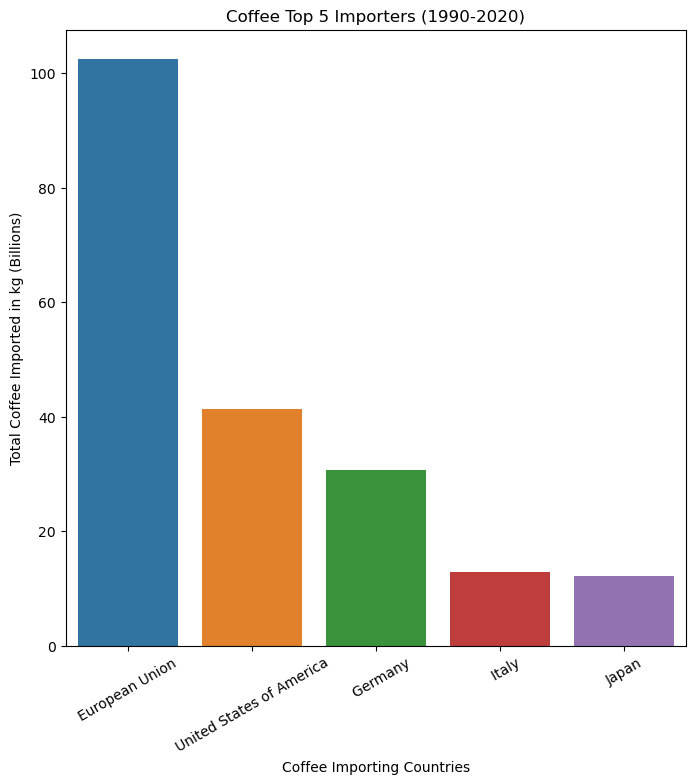

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x="Country",
           y=top5_imports["Total_imports"]/1000000 ,
           data=top5_imports,
           errorbar=None,
#           hue="Coffee type"
           )
ax.set_ylabel("Total Coffee Imported in kg (Billions)")
ax.set_xlabel("Coffee Importing Countries")
ax.set_title("Coffee Top 5 Importers (1990-2020)")
ax.xaxis.set_tick_params(rotation=30);

fig.savefig("../images/top5_imports.png")

In [9]:
#Create df of export with only top 5 countries
imports_time = imports[imports['Country'].isin(top5_imports['Country'])]
#transpose df, making sure to sort values
imports_time = imports_time.sort_values(by=['Total_imports'],ascending=False).T
#drop the non-numeric and totals rows
imports_time.drop(['Country', 'Total_imports'], axis=0, inplace=True)
# use top 5 country names
imports_time.columns = top5_imports['Country'].values
#set index name 
imports_time.index.name = 'Year'
#reset the index
imports_time.reset_index()
imports_time

,European Union,United States of America,Germany,Italy,Japan
Year,,,,,
1990,2572980,1260420,820260,314520,319800
1991,2468640,1190400,793740,277800,330600
1992,2671800,1376340,827340,275700,319560
1993,2715240,1159740,846420,335640,341460
1994,2724120,970260,814980,333240,373020
1995,2605440,1026420,771120,323280,329340
1996,2784480,1166700,810420,336480,359640
1997,2871900,1220580,834300,344580,355260
1998,2932140,1261800,824400,353340,361620


In [10]:
#import_time["Viet Nam"].sum()

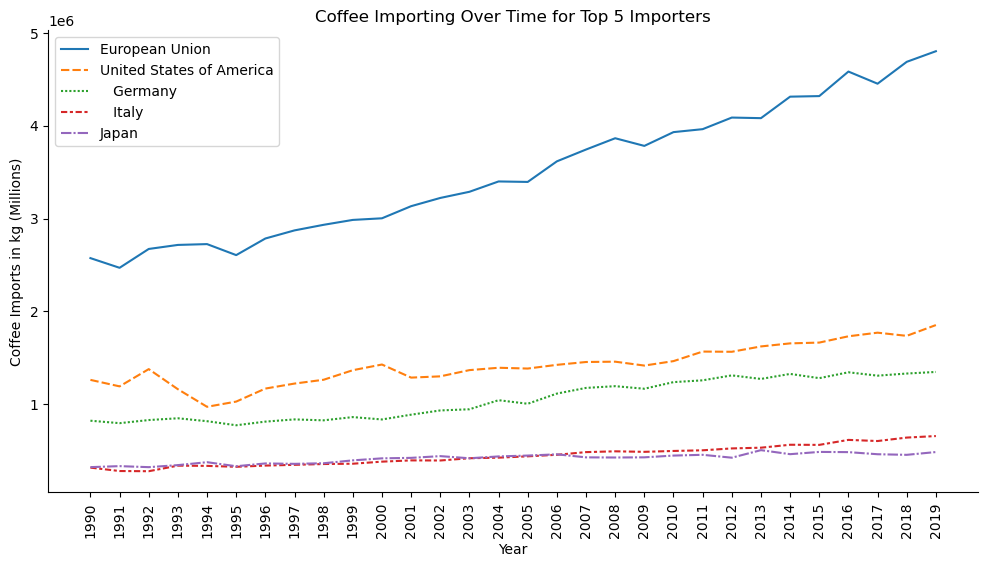

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=imports_time,
            )
ax.set_title("Coffee Importing Over Time for Top 5 Importers")
ax.set_ylabel("Coffee Imports in kg (Millions)")
ax.xaxis.set_tick_params(rotation=90)
sns.despine();

fig.savefig("../images/top5_importers_over_time.png")